In [2]:
#http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
import numpy as np
import sklearn
from sklearn import datasets, linear_model
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

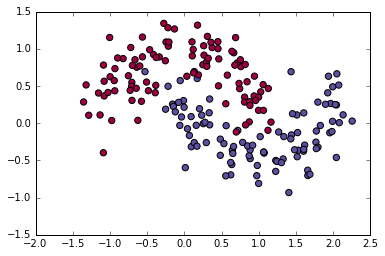

In [3]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [1]:
# X

In [9]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [10]:
# clf = sklearn.linear_model.LogisticRegressionCV()
# clf.fit(X, y)

# plot_decision_boundary(lambda x: clf.predict(x))
# plt.title("Logistic Regression")
# plt.show()

In [11]:
num_examples = len(X)
nn_input_dim = 2
nn_output_dim = 2

epsilon = 0.01
reg_lambda = 0.01

In [12]:
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    data_loss += (reg_lambda / 2) * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return (1.0/num_examples) * data_loss

In [13]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [14]:
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    np.random.seed()
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    
    model = {}
    
    # Gradient Descent in batch
    for i in range(0, num_passes):
        
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1 # y hat - y
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
3          print( "Loss after iteration %i: %f" %(i, calculate_loss(model)) )
    return model

In [15]:
W1 = np.random.randn(nn_input_dim, 3)
W1

array([[-0.68417537,  0.58308427,  0.22231612],
       [-0.7643537 , -0.80058137, -0.23328608]])

In [16]:
W1 = W1 / np.sqrt(nn_input_dim) # sqrt(2)
W1

array([[-0.48378504,  0.41230284,  0.15720124],
       [-0.54047969, -0.56609651, -0.16495817]])

Loss after iteration 0: 0.470739
Loss after iteration 1000: 0.069429
Loss after iteration 2000: 0.069449
Loss after iteration 3000: 0.071221
Loss after iteration 4000: 0.071263
Loss after iteration 5000: 0.071287
Loss after iteration 6000: 0.071301
Loss after iteration 7000: 0.071308
Loss after iteration 8000: 0.071313
Loss after iteration 9000: 0.071315
Loss after iteration 10000: 0.071316
Loss after iteration 11000: 0.071317
Loss after iteration 12000: 0.071317
Loss after iteration 13000: 0.071317
Loss after iteration 14000: 0.071317
Loss after iteration 15000: 0.071317
Loss after iteration 16000: 0.071317
Loss after iteration 17000: 0.071317
Loss after iteration 18000: 0.071316
Loss after iteration 19000: 0.071316


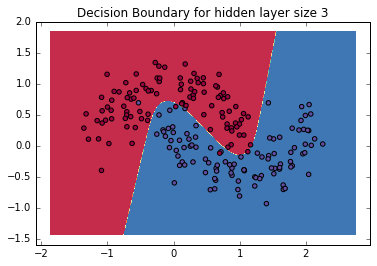

In [15]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

In [18]:
plt.show()

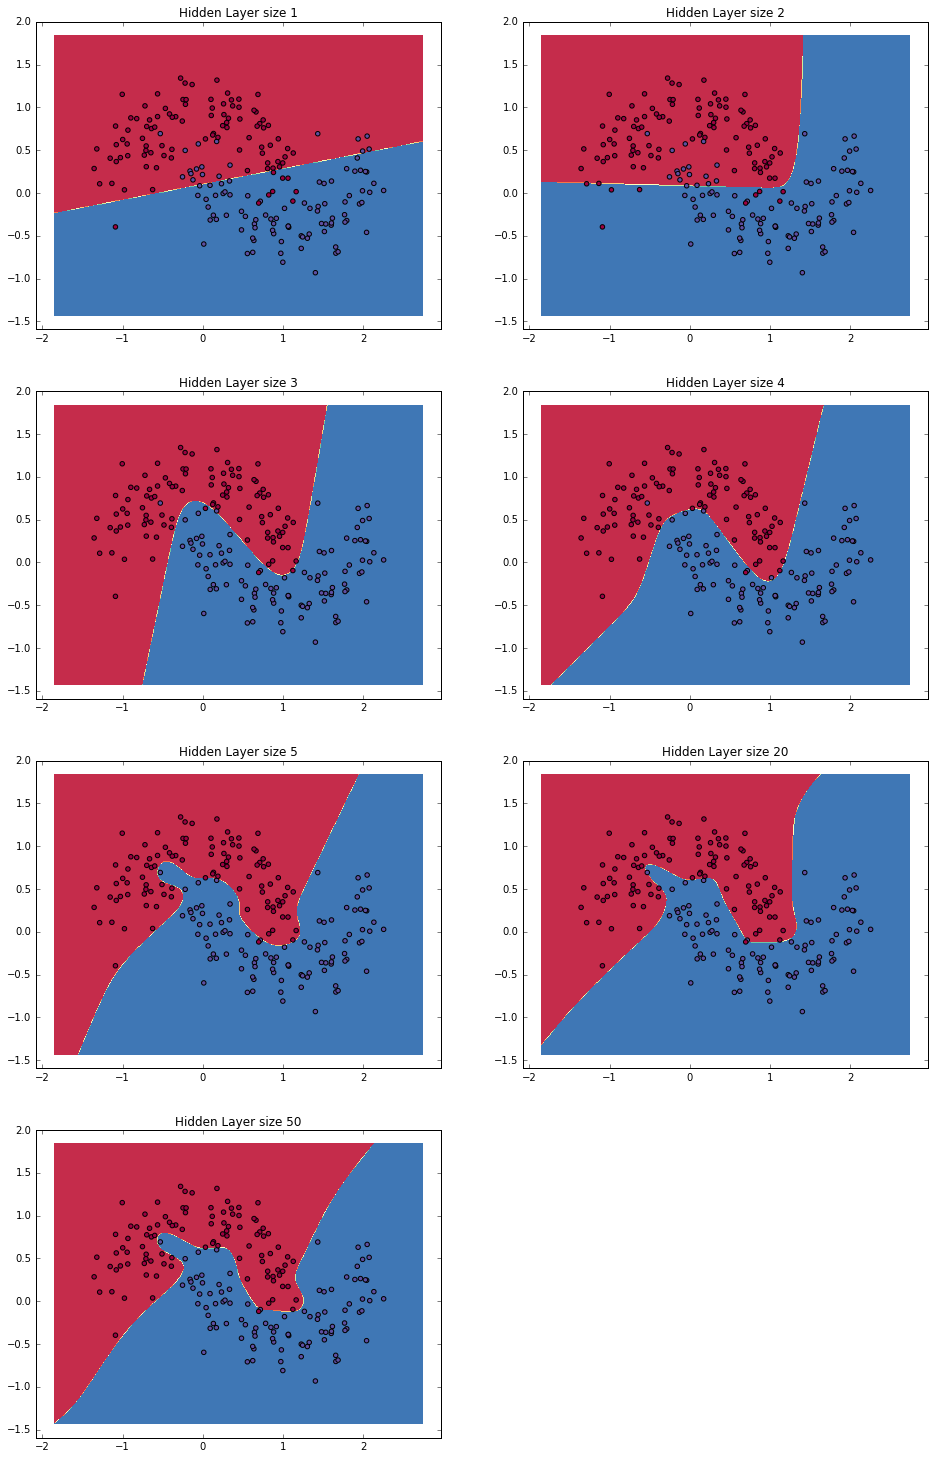

In [20]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()